# Boosting Models

## Drill: Improve this gradient boost model


by: Melissa N 

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
display(X.head())

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [4]:
X.columns

Index(['year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet',
       'sclact', 'gndr', 'agea', 'CH', 'CZ', 'DE', 'ES', 'NO', 'SE'],
      dtype='object')

In [5]:
display(y.head())

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: partner, dtype: float64

In [6]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.65%
Percent Type II errors: 17.61%

Test set accuracy:
Percent Type I errors: 6.26%
Percent Type II errors: 18.53%


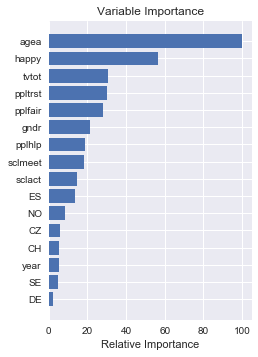

In [7]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

 Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:   

Creating new features   
Applying more overfitting-prevention strategies like subsampling  
More iterations   
Trying a different loss function   
Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications   

### Creating / Removing Features

In [8]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

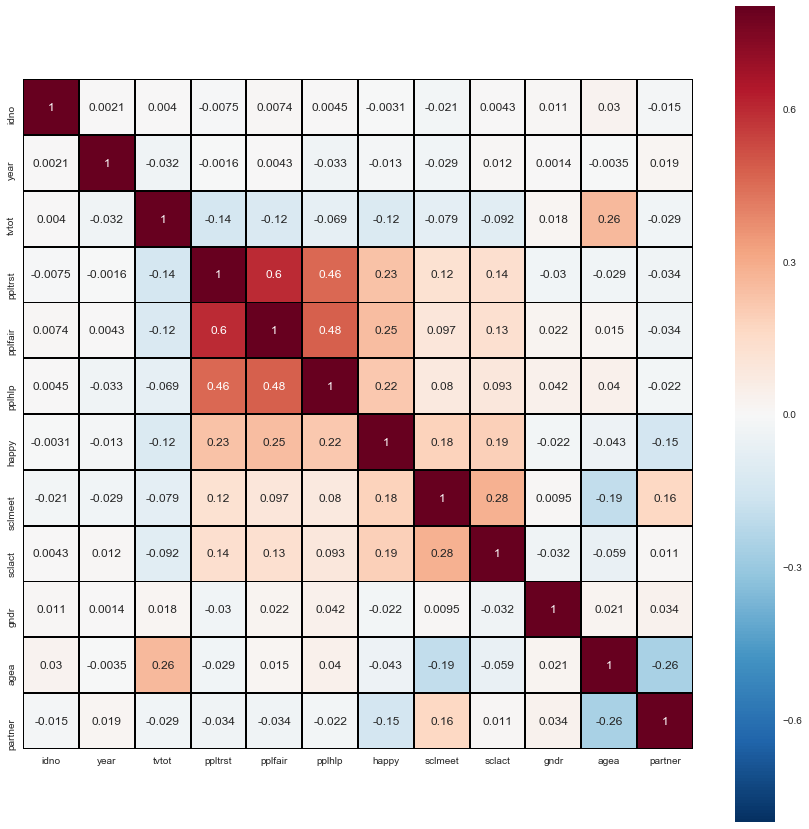

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

From this correlation matrix,   
We see that only __sclmeet__ has a strong correlation with partner 0.16

Also we can note that __idno__, __year__ and __tvtot__ are some of the features that could be remove since the have no strong correlation with our outcome __partner__

In [10]:
df_f = df[['cntry', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr','agea', 'partner']]

In [11]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df_f.loc[:, ~df_f.columns.isin(['partner', 'cntry'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [12]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.61%
Percent Type II errors: 17.81%

Test set accuracy:
Percent Type I errors: 4.79%
Percent Type II errors: 19.39%


There is a small change when we look at the type I errors for the Test set accuracy after removing non important features.

In [13]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [14]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1841


,Predict False,Predict True
Actual False,4636,377
Actual True,1464,1670


False Positives (Type I error): 377 (7.5%)
False Negatives (Type II error): 1464 (46.7%)

Score on training set: 77.403%

Cross validation results: 74.506% ± 2.327% 
 
 [ 0.76748466  0.70736196  0.77177914  0.737876    0.74078624]


## Creating New Features 

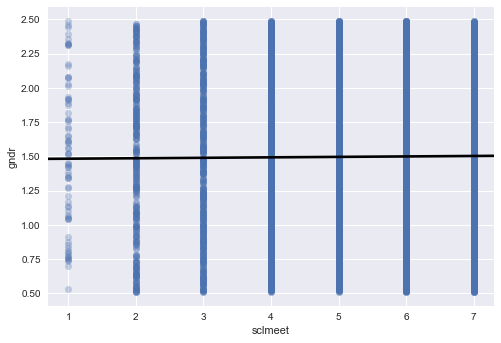

In [15]:
# Find an indicator for 'Meeting Partner.


sns.regplot(
    df['sclmeet'],
    y=df['gndr'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

#df_f['meet_gender'] = df['sclmeet'] * df['gndr']

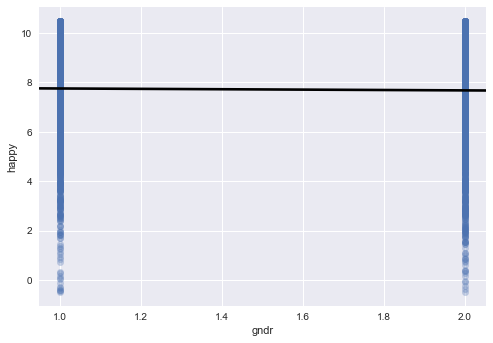

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
# Find an indicator for 'age to have Partner.


sns.regplot(
    df['gndr'],
    y=df['happy'],
    y_jitter=.49,
    order=1,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

df_f['gndr_happy'] = df['gndr'] / df['happy']

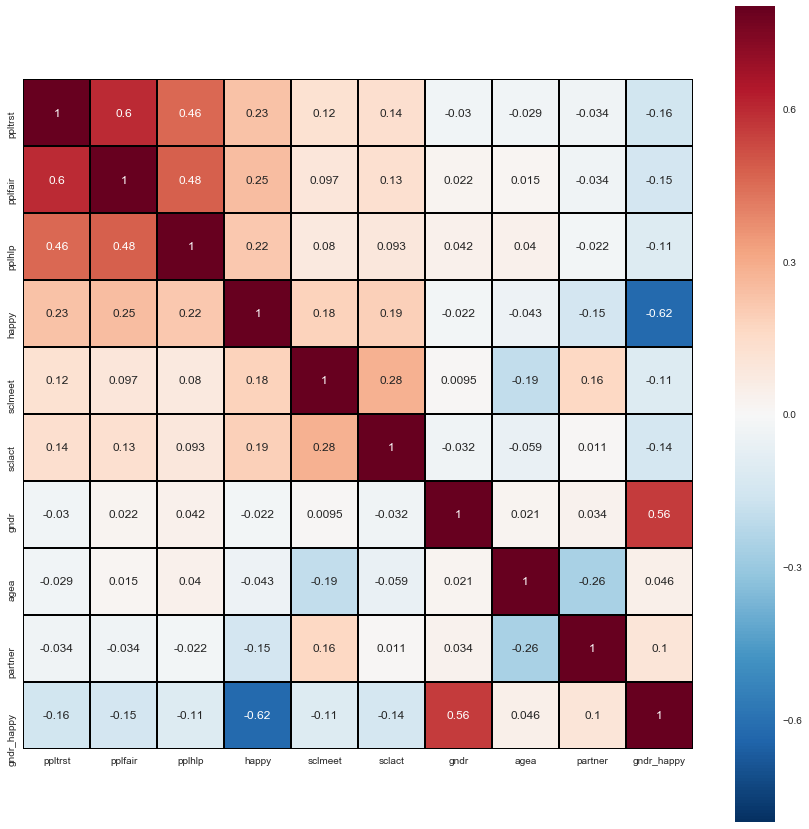

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_f.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

In [18]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df_f.loc[:, ~df_f.columns.isin(['partner', 'cntry','gndr','happy'])]
#X = X[~X.isin([np.nan, np.inf, -np.inf]).any(1)]
#X = X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
X = X.apply(lambda x: x.replace([np.inf, -np.inf], x.median()))
#X = X.apply(lambda x: x.fillna(x.median(),inplace = True))
#X = X[~np.isnan(X).any(axis=1)]
#X = X.dropna(how ='all')

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)


# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [19]:
display(X.head())

,ppltrst,pplfair,pplhlp,sclmeet,sclact,agea,gndr_happy,CH,CZ,DE,ES,NO,SE
0,3.0,10.0,5.0,5.0,4.0,60.0,0.250000,1,0,0,0,0,0
1,5.0,7.0,5.0,3.0,2.0,59.0,0.222222,1,0,0,0,0,0
2,8.0,8.0,8.0,6.0,3.0,24.0,0.142857,1,0,0,0,0,0
3,6.0,6.0,7.0,6.0,2.0,64.0,0.200000,1,0,0,0,0,0
4,6.0,7.0,5.0,7.0,2.0,55.0,0.250000,1,0,0,0,0,0


In [20]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.38%
Percent Type II errors: 18.51%

Test set accuracy:
Percent Type I errors: 5.03%
Percent Type II errors: 20.74%


There is a small change when we look at the Percent type error for the Test set accuracy after removing non important features.

In [21]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [22]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1888


,Predict False,Predict True
Actual False,4651,362
Actual True,1526,1608


False Positives (Type I error): 362 (7.2%)
False Negatives (Type II error): 1526 (48.7%)

Score on training set: 76.826%

Cross validation results: 74.076% ± 2.092% 
 
 [ 0.76319018  0.71042945  0.76564417  0.73296501  0.73157248]


## Hyper Parameters

### Change the max_depth to 5

In [23]:
# We'll make 500 iterations, use 5-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.82%
Percent Type II errors: 8.16%

Test set accuracy:
Percent Type I errors: 8.10%
Percent Type II errors: 19.02%


This is overfiting b/c the test set has better results than the Training set   

In [24]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [25]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 879


,Predict False,Predict True
Actual False,4887,126
Actual True,753,2381


False Positives (Type I error): 126 (2.5%)
False Negatives (Type II error): 753 (24.0%)

Score on training set: 89.211%

Cross validation results: 69.557% ± 5.618% 
 
 [ 0.75644172  0.67116564  0.72822086  0.72437078  0.59766585]


### Change the loss function to exponential

In [26]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.31%
Percent Type II errors: 18.75%

Test set accuracy:
Percent Type I errors: 4.66%
Percent Type II errors: 20.49%


This is overfiting b/c the test set has better results than the Training set  

In [27]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [28]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1896


,Predict False,Predict True
Actual False,4659,354
Actual True,1542,1592


False Positives (Type I error): 354 (7.1%)
False Negatives (Type II error): 1542 (49.2%)

Score on training set: 76.728%

Cross validation results: 73.880% ± 2.225% 
 
 [ 0.76196319  0.70613497  0.76441718  0.73726212  0.72420147]


### Change to 100 n_estimators


In [29]:
# We'll make 100 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.19%
Percent Type II errors: 19.97%

Test set accuracy:
Percent Type I errors: 4.91%
Percent Type II errors: 20.98%


This is performing about the same on the Test set as it does on the Training set.  
We can conclude that the model predicts well on itself.   

In [30]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [31]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1982


,Predict False,Predict True
Actual False,4666,347
Actual True,1635,1499


False Positives (Type I error): 347 (6.9%)
False Negatives (Type II error): 1635 (52.2%)

Score on training set: 75.672%

Cross validation results: 74.739% ± 1.588% 
 
 [ 0.76257669  0.73190184  0.76871166  0.72928177  0.74447174]


### Change Sumbsample to 0.8

In [32]:
# We'll make 100 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'subsample': 0.8}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 4.24%
Percent Type II errors: 18.26%

Test set accuracy:
Percent Type I errors: 5.15%
Percent Type II errors: 20.12%


This is overfiting b/c the test set has better results than the Training set 

In [33]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [34]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 1856


,Predict False,Predict True
Actual False,4660,353
Actual True,1503,1631


False Positives (Type I error): 353 (7.0%)
False Negatives (Type II error): 1503 (48.0%)

Score on training set: 77.219%

Cross validation results: 73.966% ± 2.403% 
 
 [ 0.76503067  0.70429448  0.76809816  0.73296501  0.72788698]


### Change learning_rate to 0.005

In [35]:
# We'll make 100 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
          'learning_rate': 0.005}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 2.96%
Percent Type II errors: 22.27%

Test set accuracy:
Percent Type I errors: 4.91%
Percent Type II errors: 21.72%


This is overfiting b/c the test set has better results than the Training set 

In [36]:
target = y
data = X
y_pred = clf.predict(data)
score = clf.score(data, target) 
cross_val = cross_val_score(clf, data, target, cv=5)

In [37]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

cm = confusion_matrix(target, y_pred)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (target == True).sum() 
a_neg = (target == False).sum() 
p_pos = (y_pred == True).sum() 
p_neg = (y_pred == False).sum() 
tot = data.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))
plusminus = u"\u00B1"
print('\nScore on training set: {:.3%}'.format(score)) 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cross_val.mean(), plusminus, cross_val.std(), cross_val))


Number of mislabeled points out of a total 8147 points : 2067


,Predict False,Predict True
Actual False,4756,257
Actual True,1810,1324


False Positives (Type I error): 257 (5.1%)
False Negatives (Type II error): 1810 (57.8%)

Score on training set: 74.629%

Cross validation results: 73.806% ± 1.419% 
 
 [ 0.76134969  0.72699387  0.74662577  0.72252916  0.73280098]
